# Projektna naloga
## Analiza podatkov iz csv datoteke
Analiziramo datoteko Podatki.csv, pridobljeno s pomočjo main.py.

In [120]:
import pandas as pd                                                                           #za delo s podatki
import matplotlib.pyplot as plt                                                               #za risanje
from IPython.display import HTML                                                              #za lepše barve

pd.set_option("display.max_rows", 20)
%matplotlib inline
tabela = pd.read_csv("Podatki.csv", index_col="IME SKLADBE")


In [121]:
tabela

,Instrumenti,Stil,Opus,Datum kompozicije,Vir,Avtorske pravice,Zadnja posodobitev,Glasbeni ID,Typeset
IME SKLADBE,,,,,,,,,
Vocalise № 1,"Voice, Piano",Romantic,Not known,Not known,"Practical Singing Tutor for All Voices, G.Schi...",Public Domain,2019/Jul/24,Mutopia-2019/07/24-2247,"LilyPond, version 2.18.2"
When the Swallows Homeward Fly (Agathe),Voice and Piano,Song,NaN,c. 1846,Not known,Public Domain,2014/Nov/13,Mutopia-2014/11/13-439,"LilyPond, version 2.18.2"
Giselle - Pas de deux (1er Acte),Piano,Classical,Not known,Not known,New arrangement,Public Domain,2006/Dec/22,Mutopia-2006/12/22-897,"LilyPond, version 2.10.4"
Minuit Chrétiens,Voice and Piano,Hymn,Not known,Not known,Ed. Léon Grus,Public Domain,2005/Dec/09,Mutopia-2005/12/09-640,"LilyPond, version 2.6.5"
The Blue Alsatian Mountains,Voice and Piano,Song,Not known,Not known,Not known,Public Domain,2014/Nov/13,Mutopia-2014/11/13-440,"LilyPond, version 2.18.2"
...,...,...,...,...,...,...,...,...,...
La Traviata - N18 Scena finale,Piano,Romantic,Not known,Not known,Calcografía de la 'Nueva Biblioteca Musical Ec...,Public Domain,2008/Aug/12,Mutopia-2008/08/12-1519,"LilyPond, version 2.10.33"
La Traviata - Preludio,Piano,Romantic,Not known,Not known,Calcografía de la 'Nueva Biblioteca Musical Ec...,Public Domain,2008/Jan/13,Mutopia-2008/01/13-1213,"LilyPond, version 2.10.33"
Rondo,Piano,Classical,"Opus 42, No. 1, Meter",18th Century,"Unknown, late 19th Century",Public Domain,2013/Jan/13,Mutopia-2013/01/13-192,"LilyPond, version 2.16.1"


## Stil

Že iz zgornje tabele lahko izčrpamo veliko informacij. Kateri stili pa so najpogostejši?

In [122]:
pogosti_stili = tabela["Stil"].value_counts()
pogosti_stili

Stil
Romantic           275
Classical          177
Baroque            165
Folk                68
Song                26
Jazz                23
Technique           20
Modern              17
Hymn                 6
Popular / Dance      6
March                4
Renaissance          1
Name: count, dtype: int64

Zgoraj torej vidimo, kolikokrat se pojavi posamezen stil, najpogostejši pa je...?

In [123]:
najpogostejsi_stil = pogosti_stili.idxmax()

In [124]:
HTML(f"<h4>Najpogostejši stil je <span style='color:gold;'>{najpogostejsi_stil}</span></h4>")

Predstavimo pogostost stilov še grafično.

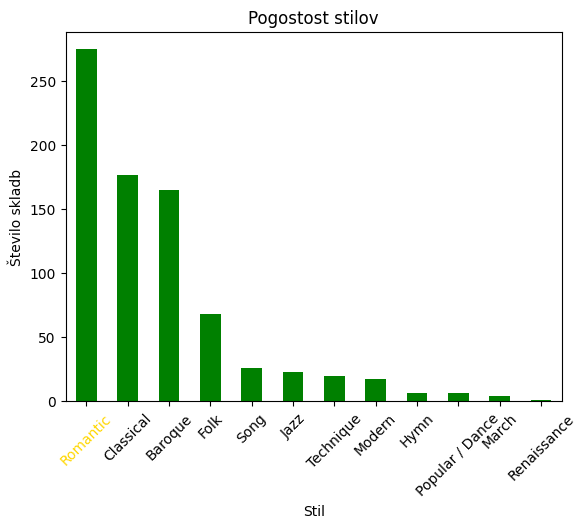

In [125]:
graf = pogosti_stili.plot(kind="bar", color="green")
plt.title("Pogostost stilov")
plt.xlabel("Stil")
plt.ylabel("Število skladb")
plt.xticks(rotation=45)    #rotiramo imena na x-osi, za lepšo vidljivost

#Pobarvamo Romantic še zlato
oznake =graf.get_xticklabels()
for oznaka in oznake:
    if oznaka.get_text() == "Romantic":
        oznaka.set_color("gold")
        


## Inštrumenti

Oglejmo si še pogostost inštrumentov. Pričakujemo, da bo najpogostejši klavir, saj so podatki note, napisane za igranje klavirja.

In [126]:
pogosti_instrumenti = tabela["Instrumenti"].value_counts()
pogosti_instrumenti

Instrumenti
Piano                             461
Harpsichord, Piano                119
Voice and Piano                    87
Piano Duet                         37
Harpsichord, Piano, Clavichord     18
                                 ... 
Choir SSAA, Piano                   1
Voice, Horn and Piano               1
Voice, Clarinet and Piano           1
Trumpet, Percussion and Piano       1
Voice (Baritone), Piano             1
Name: count, Length: 42, dtype: int64

In [127]:
najpogostejsi_instrument = pogosti_instrumenti.idxmax()
HTML(f"<h4>Najpogostejši inštrument je kot pričakovano <span style='color:gold;'>{najpogostejsi_instrument}.</span></h4>")

## Čas nastanka

Naredimo zdaj še podtabelo z datumom kompozicije in ugotovimo, v katerih letih je izšlo največ skladb.

In [128]:
podtabela = tabela[["Datum kompozicije"]].copy()            #damo copy!!!, ker ne moremo spreminjati dejanske tabele--> v nadaljevanju
podtabela

,Datum kompozicije
IME SKLADBE,
Vocalise № 1,Not known
When the Swallows Homeward Fly (Agathe),c. 1846
Giselle - Pas de deux (1er Acte),Not known
Minuit Chrétiens,Not known
The Blue Alsatian Mountains,Not known
...,...
La Traviata - N18 Scena finale,Not known
La Traviata - Preludio,Not known
Rondo,18th Century


In [129]:
#Pretvorimo datume kompozicij v numerične vrednosti, kjer je to mogoče
podtabela["Datum kompozicije"] = pd.to_numeric(podtabela["Datum kompozicije"], errors="coerce")
podtabela = podtabela.dropna()        #Odstranimo manjkajoče vrednosti 


#Določimo zdaj časovna obdobja
leta = [1600, 1700, 1800, 1850, 1900, 1950, 2000, 2050]
oznake = ["1600-1700", "1700-1800", "1800-1850", "1850-1900", "1900-1950", "1950-2000", "2000-2050"]

#Ustvarimo no stolpec "Obdobja"
podtabela["Obdobje"] = pd.cut(podtabela["Datum kompozicije"], bins=leta, labels=oznake)

#Popravimo še napako (A value is trying to be set on a copy of a slice from a DataFrame.Try using .loc[row_indexer,col_indexer] = value instead)
podtabela.loc[:, "Obdobje"] = pd.cut(podtabela["Datum kompozicije"], bins=leta, labels=oznake)
podtabela

C:\Users\Marija\AppData\Local\Temp\ipykernel_17436\2129590517.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podtabela["Obdobje"] = pd.cut(podtabela["Datum kompozicije"], bins=leta, labels=oznake)


,Datum kompozicije,Obdobje
IME SKLADBE,,
Rumores de la Caleta,1887.0,1850-1900
Prélude,1846.0,1800-1850
Prélude Nr. 2,1846.0,1800-1850
Toccatina,1872.0,1850-1900
"Ermuntre dich, mein schwacher Geist",1736.0,1700-1800
...,...,...
Oats and Beans,1893.0,1850-1900
The Water of Tyne,1893.0,1850-1900
The St. Louis Rag,1903.0,1900-1950


Zgoraj je prikazana tabela z dodanim stolpcem "Obdobje", ki nam bo omogočal nadaljno analizo.

Preštejmo sedaj, koliko skladb pripada v določeno obdobje in imena skladb v najpogostejšem obdobju.

In [130]:
pogostost_obdobij = podtabela["Obdobje"].value_counts()
pogostost_obdobij

Obdobje
1800-1850    125
1850-1900     68
1700-1800     37
1900-1950     35
2000-2050     12
1950-2000      2
1600-1700      0
Name: count, dtype: int64

In [131]:
obdobje_z_najvec_skladbami = pogostost_obdobij.idxmax()
obdobje_z_najvec_skladbami

'1800-1850'

Vidimo, da je največ skkladb narejenih med leti 1800 in 1850. Predstavimo to še grafično:

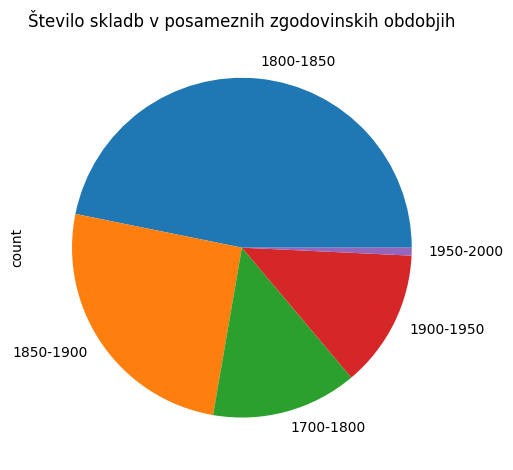

In [116]:
graf = pogostost_obdobij.plot(kind="pie")
plt.title("Število skladb v posameznih zgodovinskih obdobjih")
plt.xticks(rotation=0)  #Da bodo oznake obdobij vodoravne
plt.tight_layout()

## Nekaj zanimivosti

Oglejmo si katera črka se največrat pojavi v imenu skladbe.

In [153]:
slovarcek = {}
skladbe = podtabela.index
vsa_imena =";".join(skladbe)
vsa_imena = vsa_imena.lower()

for crka in vsa_imena:
    if crka.isalpha():
        if crka in slovarcek:
            slovarcek[crka] += 1  
        else:
            slovarcek[crka] = 1 


najpogostejsa_crka = ""
najvec_pojavitev = 0

for crka, stevilo in slovarcek.items():
    if stevilo > najvec_pojavitev:
        najvec_pojavitev = stevilo
        najpogostejsa_crka = crka

najpogostejsa_crka

'e'